# Visualization
This notebook visualize result for comparison

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = f"/content/drive/MyDrive/Tamura/thesis/result/"

rec_3ds = pd.read_csv(f"{path}rectangular_3ds.csv", index_col=0)
cyl_3ds = pd.read_csv(f"{path}cylinder_3ds.csv", index_col=0)
cyl_r1 = pd.read_csv(f"{path}cylinder_R1.csv", index_col=0)
cyl_sr = pd.read_csv(f"{path}cylinder_SR.csv", index_col=0)
wri_3ds = pd.read_csv(f"{path}humanwrist_3ds.csv", index_col=0)
wri_r1 = pd.read_csv(f"{path}humanwrist_R1.csv", index_col=0)
wri_sr = pd.read_csv(f"{path}humanwrist_SR.csv", index_col=0)
wri_r1 = pd.read_csv(f"{path}humanwrist_R1.csv", index_col=0)
wri_sr = pd.read_csv(f"{path}humanwrist_SR.csv", index_col=0)

In [ ]:
# @title Original Function
def compare_difference(difference='difference', **kwargs):
  df_list = []
  for key in kwargs:
    kwargs[key] = kwargs[key].max().to_frame(name=key).T
    df_list.append(kwargs[key])
  df = pd.concat(df_list).stack().rename("y").rename_axis([difference, "x"]).reset_index()
  sns.set(font_scale=1.3)
  fig = sns.barplot(data=df, x=df.x, y=df.y, hue=df[difference])
  fig.set_xlabel("Machine Learning Algorithm")
  fig.set_ylabel("$r^2$")
  return fig

def noise_amplitude_effect(without, SR, fig_num=[2, 2]):
  without = pd.concat([without]*len(SR.index)).set_axis(SR.index, axis='index')
  x, y = np.meshgrid(np.arange(fig_num[0]), np.arange(fig_num[1]))
  grid_x, grid_y = iter(x.flatten()), iter(y.flatten())
  fig, ax = plt.subplots(2, 2, sharex=True,figsize=(8,6))
  for col in without.columns:
    i, j = next(grid_x), next(grid_y)
    sns.lineplot(data=without[col], ax=ax[i, j], linestyle='--', label='R1')
    sns.lineplot(data=SR[col], ax=ax[i, j], label='SR')
    ax[i, j].get_legend().remove()
  fig.supxlabel('$\sigma$')
  fig.supylabel('$r^2$')
  plt.tight_layout()
  plt.xscale("log")
  lines, labels = ax[fig_num[0]-1, fig_num[1]-1].get_legend_handles_labels()
  fig.legend(lines, labels, loc='lower left')
  return fig
#plt.savefig(f"{path}img/savename.png") for save plot

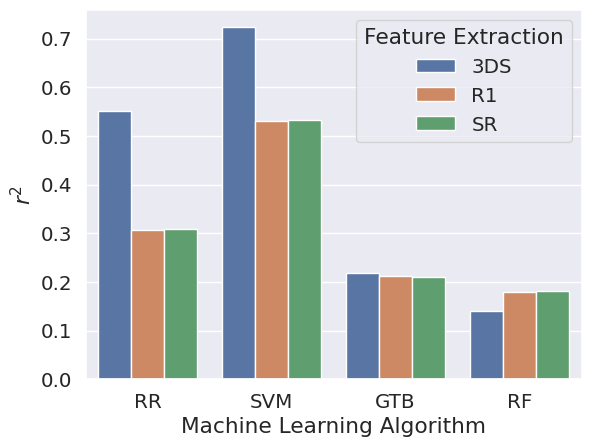

In [ ]:
data = {"3DS": wri_3ds,
        "R1": wri_r1,
        "SR": wri_sr,
        }
what_difference = "Feature Extraction"
fig = compare_difference(what_difference, **data)

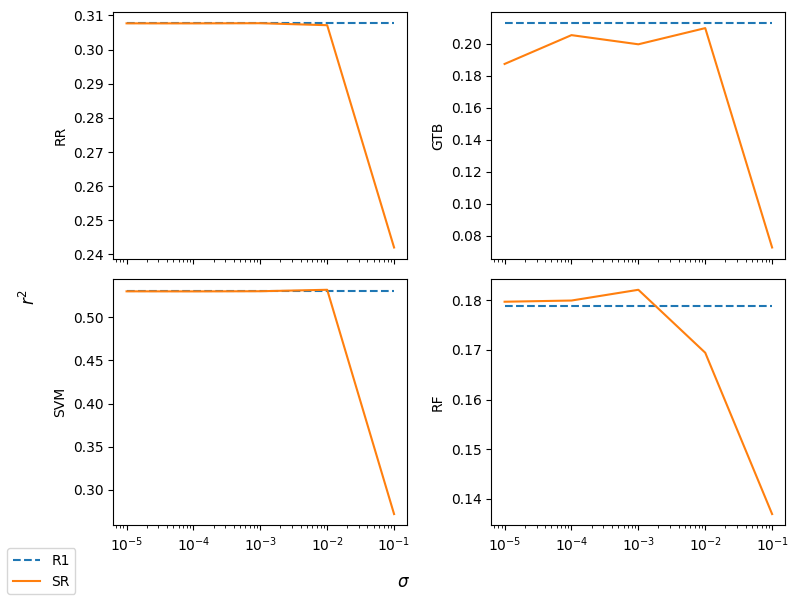

In [ ]:
fig = noise_amplitude_effect(wri_r1, wri_sr)